In [1]:
import numpy as np
from game import RandomGenerator, GameGenerator, Game
from model import qmodel, DirectDiffModel, LateralDiffModel

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [6]:
nactions = 2
game = Game()
qm=qmodel(2, game.NActions)
g=RandomGenerator(game, 20)
x,y = next(g.generate())
s0,_,_,_ = x
qm.predict_on_batch(s0)
#tm=LateralDiffModel(qm, 0.5, 1.0)
tm=DirectDiffModel(qm, 0.99)



In [7]:
tm.fit_generator(g, steps_per_epoch = 1000, epochs=20, verbose=1)

Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0140
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0102
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0095
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0047
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0048
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0048
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0046
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0047
Epoch 11/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0045
Epoch 12/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0047
E

In [9]:
tm.fit_generator(g, steps_per_epoch = 10000, epochs=10, verbose=1)

Epoch 1/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0038
Epoch 2/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0033
Epoch 3/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0029
Epoch 4/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0028
Epoch 5/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0027
Epoch 6/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0026
Epoch 7/10
10000/10000 [==============================] - 15s 2ms/step - loss: 0.0026
Epoch 8/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0025
Epoch 9/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0025
Epoch 10/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0025


In [4]:
def sample(nx, ny, model):
    x = np.arange(0.0, 1.0, 1.0/nx)
    y = np.arange(0.0, 1.0, 1.0/ny)
    xg, yg = np.meshgrid(x, y)
    
    xy = np.array((xg.reshape((-1,)),yg.reshape((-1,)))).T
    #print "s:",s.shape,s
    q = model.predict_on_batch(xy)
    w = q.shape[-1]
    #q = q - np.min(q, axis=-1, keepdims=True)
    return xg, yg, q.reshape((nx, ny, w))


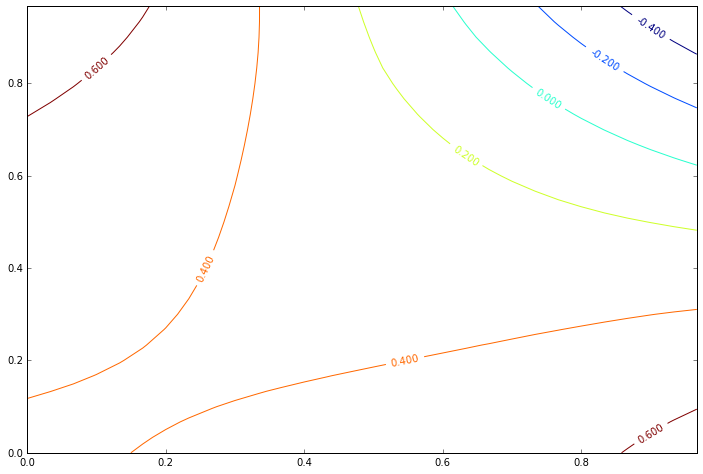

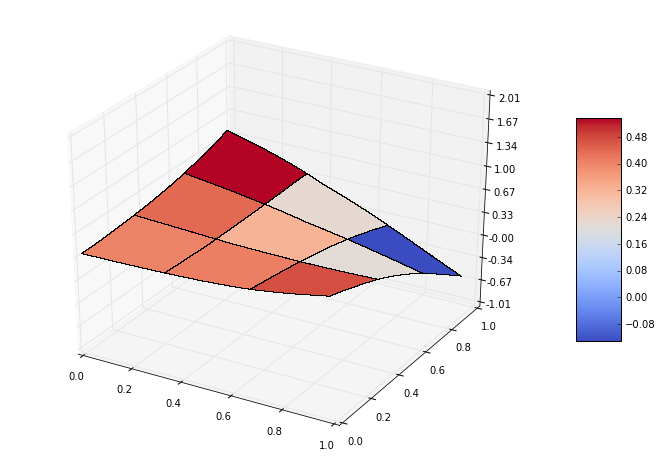

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

def plot_quiver(model):
    x,y,q = sample(30,30,model)
    
    basis = np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
            [-1.0, 0.0],
            [0.0, -1.0]
        ]
    )

    vec = np.dot(q, basis)
    
    fig, ax = plt.subplots()
    surf = ax.quiver(x, y, u, v)
    #ax.clabel(surf, inline=1, fontsize=15)
    
def plot_contour(model):
    x,y,q = sample(30,30,model)
    
    plt.figure(figsize=(12,8))
    
    qmax = np.max(q, axis=-1)
    
    #ax = plt.subplot(122)
    CS = plt.contour(x, y, qmax)
    plt.clabel(CS, inline=1, fontsize=10)
    
    
def plot_surface(model):
    x,y,q = sample(30,30,model)
    
    #print q
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    
    qmax = np.max(q, axis=-1)
    
    #ax = plt.subplot(122)
    surf = ax.plot_surface(x, y, qmax, cmap=cm.coolwarm,
                           linewidth=0.01, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-1.01, 2.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)    
    
    
plot_contour(qm)
plot_surface(qm)


In [ ]:
next(g)

In [ ]:
next(g.generate())

In [ ]:
x=np.random.random((10,))
print x
print x[:,None]

In [ ]:
from generate import GameGenerator

In [ ]:
qm=qmodel(2, 2)
g = GameGenerator(qm, 10, 2, 1.0).generate()
next(g)

In [10]:
c1=[1,2,3]
c2=[4,5,6]
zip(c1, c2)

[(1, 4), (2, 5), (3, 6)]